In [1]:
import numpy as np
import matplotlib.pyplot as plt

from batch_generator import COCOBatchGenerator
from utils import deprocess_HR, deprocess_LR

%matplotlib inline

In [2]:
# create an instance of COCOBatchGenerator 

batch_gen = COCOBatchGenerator('data/COCO/train2014/',
                               target_size=(256,256),
                               downscale_factor=4, 
                               batch_size=8,
                               shuffle=True,
                               seed=None,
                               color_mode='rgb',
                               crop_mode='fixed_size',
                               data_format='channels_last')

Found 82783 images


In [3]:
# to get a batch of LR + HR images, use .next() method
batch_LR, batch_HR = batch_gen.next()
print(batch_LR.shape, batch_LR.dtype)
print(batch_HR.shape, batch_HR.dtype)

(8, 64, 64, 3) float32
(8, 256, 256, 3) float32


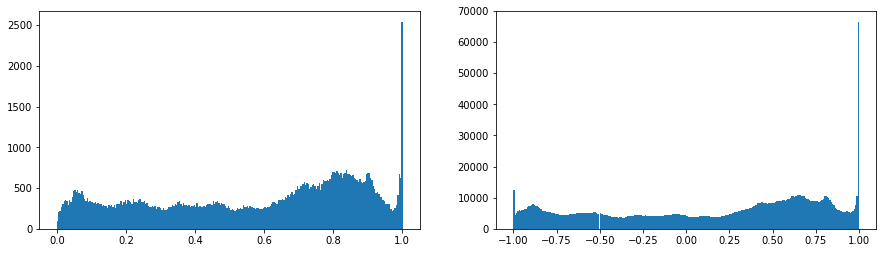

In [4]:
# batch_LR : images sclaled into [0,1]
# batch_HR : images scaled into [-1,1]

plt.figure(figsize=(15,4))
plt.subplot(121)
_ = plt.hist(batch_LR.flatten(), bins=255)
plt.subplot(122)
_ = plt.hist(batch_HR.flatten(), bins=255)
plt.show()

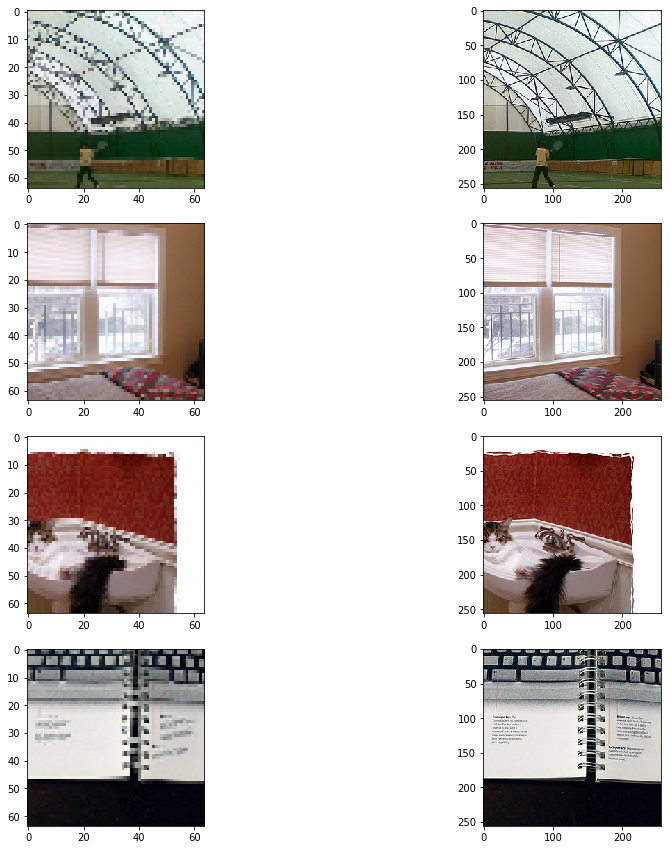

In [5]:
# use deprocess_LR and deprocess_HR to undo the specific preprocessing 
# returned arrays are still np.float32 ! 
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
for i in range(4):
    axes[i, 0].imshow(deprocess_LR(batch_LR[i]).astype(np.uint8))
    axes[i, 1].imshow(deprocess_HR(batch_HR[i]).astype(np.uint8))

In [6]:
%%time
for i in range(100):
    batch_LR, batch_HR = batch_gen.next()

CPU times: user 2min 51s, sys: 702 ms, total: 2min 52s
Wall time: 49.8 s
